In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
read dataset
"""

from sklearn.datasets import load_iris
data = load_iris()

"""
IMPORTANT:
to use breast cancer dataset, replace the top two lines with the two below:
(an html export will be sent for breast cancer)
"""
# from sklearn.datasets import load_breast_cancer
# data = load_breast_cancer()


df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
print(data.target)
print(np.unique(data.target))
print(np.unique(data.target_names))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 1 2]
['setosa' 'versicolor' 'virginica']


In [4]:
# map samples to Class
df['type'] = data.target

# replace 0,1,2 with names
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['type'] = df['type'].replace(targets)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# create train-test sets
x = df.drop(columns="type")
y = df["type"]


print(y)
x

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: type, Length: 150, dtype: object


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
print(x.columns)
print(target_names)

feature_names = x.columns
labels = target_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
['setosa' 'versicolor' 'virginica']


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [9]:
print("train samples: ", len(x_train))
print("test samples: ", len(x_test))

train samples:  105
test samples:  45


In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

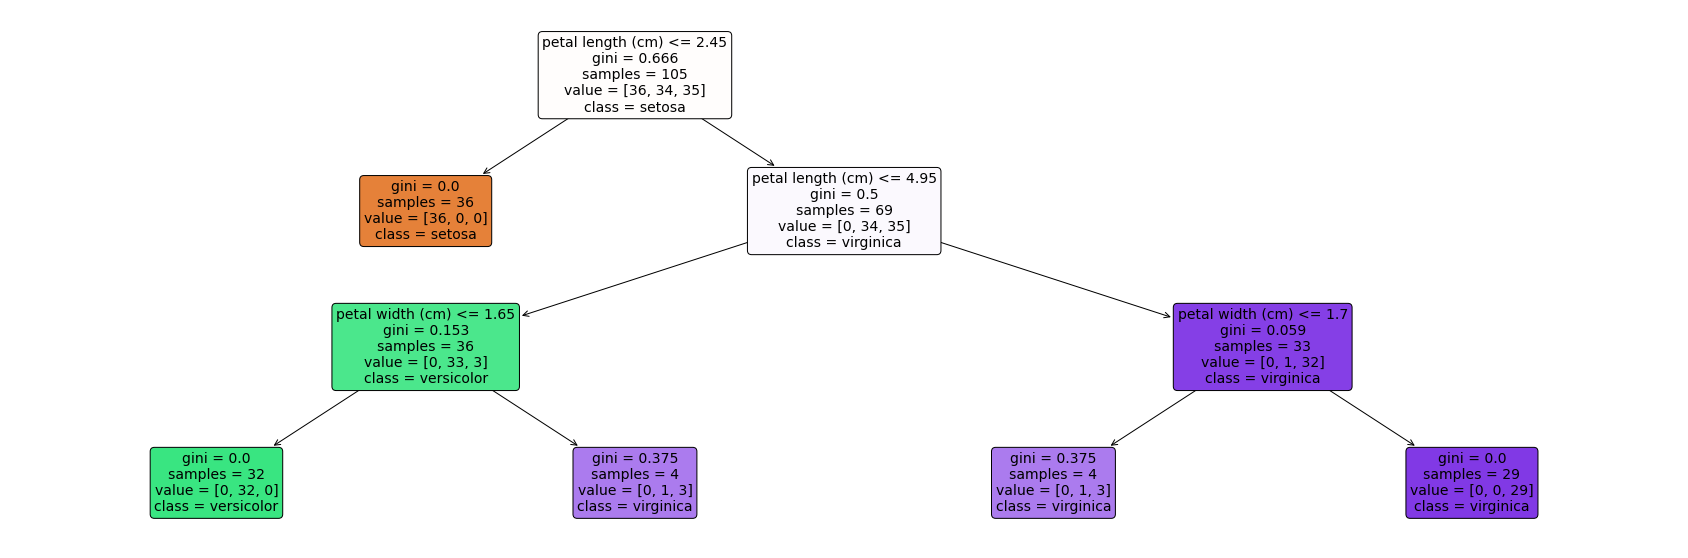

In [13]:
plt.figure(figsize=(30,10))
a = tree.plot_tree(dtree, feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))

[[14  0  0]
 [ 0 15  1]
 [ 0  2 13]]


In [16]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.94      0.91        16
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45

